C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

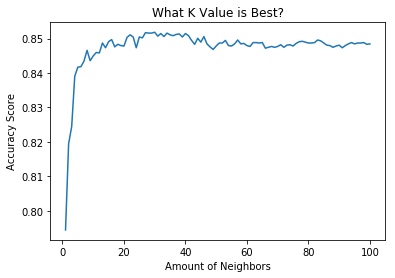

In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Create your df here:
df = pd.read_csv("profiles.csv")
df = df.dropna(subset=['body_type','height','drugs','smokes'])
weight_mapping ={"rather not say": 0,
                 "used up": 1,
                 "overweight": 2,
                 "curvy": 3,
                 "full figured": 4,
                 "a little extra": 5,
                 "skinny": 6,
                 "thin": 7,
                 "average": 8,
                 "fit": 9,
                 "athletic": 10,
                 "jacked": 11}
drug_mapping = {"never": 0,"sometimes": 1,"often": 2}
smoke_mapping = {"no": 0,"trying to quit": 1,"when drinking": 2,"sometimes": 3,"yes": 4}
gender_mapping = {"m": 0,
                 "f": 1}
all_data=df[["height","body_type","drugs","smokes"]]
all_data["body_type"] = all_data.body_type.map(weight_mapping)
all_data["drugs"] = all_data.drugs.map(drug_mapping)
all_data["smokes"] = all_data.smokes.map(smoke_mapping)
#print(all_data)
labels=df.sex.map(gender_mapping)
training_data,validation_data,training_labels,validation_labels=train_test_split(all_data,
                                   labels,
                                   test_size=.2,
                                   random_state=100)
k_list=range(1,101)
accuracies=[]
for k in range(1,101):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data,training_labels)
    accuracies.append(classifier.score(validation_data,validation_labels))

plt.plot(k_list,accuracies)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('What K Value is Best?')
plt.show()
